In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [332]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [207]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import interpolate
import h5py
import qnm
from numpy import vectorize
from scipy.interpolate import interp2d
from scipy.optimize import minimize
from scipy.optimize import least_squares
pl.rc('figure', figsize=(6.1, 4.5))
pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 2.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

In [463]:
finalfinal=np.loadtxt('rest/overtone_t_5.6')

In [464]:
chispace=np.arange(0.1,0.95,0.02)
massspace=np.arange(34,100,0.5)

In [465]:
X, Y = np.meshgrid(massspace,chispace)

In [466]:
np.max(finalfinal)

-149.19431690998522

In [467]:
mass_max=X.flatten()[np.argmax(finalfinal.flatten())]

In [468]:
spin_max=Y.flatten()[np.argmax(finalfinal.flatten())]

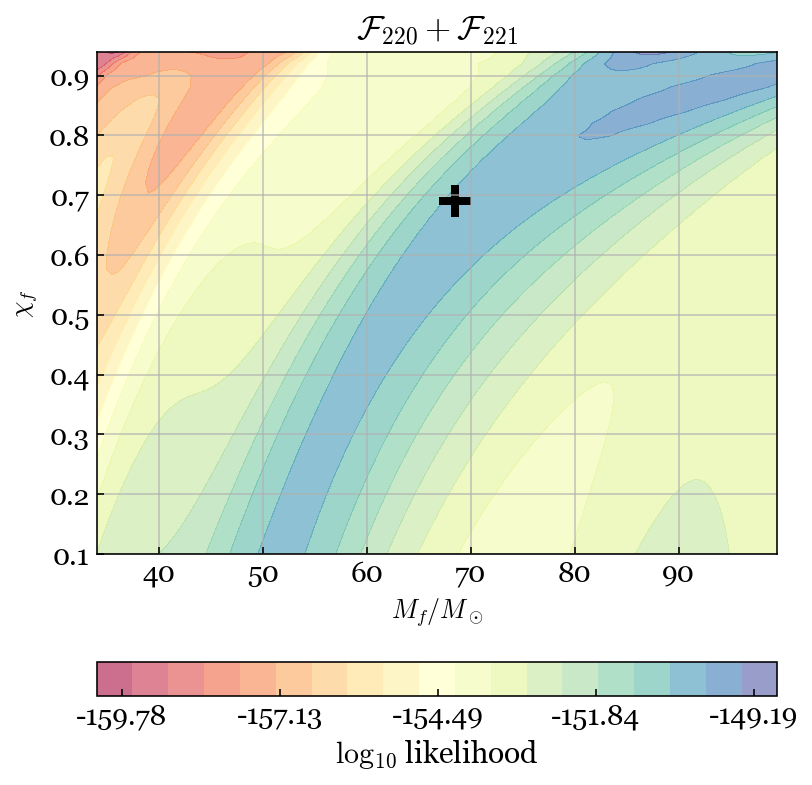

In [469]:
pl.rc('figure', figsize=(6.1, 6.6))
fig, ax = pl.subplots()
contours=ax.contourf(X, Y, finalfinal,20, cmap='Spectral', origin='lower',alpha=0.6,linestyles='--')
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.scatter(x=68.5,y=0.69,s=255,marker='+',c='k',linewidths=4,label='IMR')
# ax.scatter(x=mass_max,y=spin_max,s=255,marker='x',c='k',linewidths=4,label='IMR')
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
cbar=fig.colorbar(contours,orientation="horizontal", pad=0.15,format='%3.2f')

cbar.set_label(r'$\log_{10}$ likelihood',fontsize=15)
cbar.set_ticks(np.linspace(np.min(finalfinal),np.max(finalfinal),5))
pl.xlabel(r'$M_f/M_\odot$',fontsize=13)
pl.ylabel(r'$\chi_f$',fontsize=13)
pl.grid()

# contoursnew=ax.contour(contours,levels=[-158,-152],linewidths=2,linestyles='--',colors='k')

# counterlabel=ax.clabel(contoursnew,contoursnew.levels
#                        , inline=True, fontsize=12,fmt='%2.1f'
#                        ,rightside_up=False,use_clabeltext=True,colors='k')


# for l in counterlabel:
#     l.set_rotation(0)

# ax.set_title(r'$\mathcal{F}_{220}$')
ax.set_title(r'$\mathcal{F}_{220}+\mathcal{F}_{221}$')
pl.savefig('vary_filter/t56_overtone.pdf')